<a href="https://colab.research.google.com/github/MSoumen/Practice-With-TensorFlow/blob/master/Fun_With_Filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import numpy as np
from scipy import misc

In [2]:
i= misc.ascent()
i.shape

(512, 512)

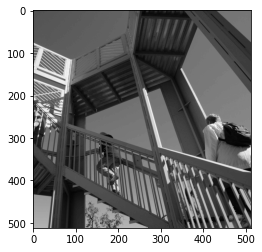

In [15]:
import matplotlib.pyplot as plt
def show_img(i):
  plt.axis('on')
  plt.gray()
  plt.imshow(i)
  plt.show()

show_img(i)

In [0]:
i_copy= np.copy(i)
height= i_copy.shape[0]
width= i_copy.shape[1]

In [0]:
# Various Filters
# filter= [[1, 1, 1],[1, -6, 1],[1, 1, 1]] # gives brighter img
# filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
# filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
filter = [ [-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]
weight = 1

Now let's create a convolution. We will iterate over the image, leaving a 1 pixel margin, and multiply out each of the neighbors of the current pixel by the value defined in the filter.

i.e. the current pixel's neighbor above it and to the left will be multiplied by the top left item in the filter etc. etc. We'll then multiply the result by the weight, and then ensure the result is in the range 0-255

Finally we'll load the new value into the transformed image.

0


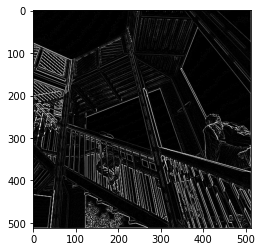

In [63]:
def convolution_3x3(height, width, filter):
  for x in range(1, height-1):
    for y in range(1, width-1):
      convo=0.0
      convo += (i[x-1, y-1] * filter[0][0])
      convo += (i[x, y-1] * filter[0][1])
      convo += (i[x+1, y-1] * filter[0][2])
      convo += (i[x-1, y] * filter[1][0])
      convo += (i[x, y] * filter[1][1])
      convo += (i[x-1, y] * filter[1][2])
      convo += (i[x-1, y+1] * filter[2][0])
      convo += (i[x, y+1] * filter[2][1])
      convo += (i[x+1, y+1] * filter[2][2])
      convo *= weight
      if (convo<0):
        convo=0
      if(convo >255):
        convo=255
      i_copy[x,y]= convo

  return i_copy, convo


img,convo= convolution_3x3(height, width, filter)

print(convo)
show_img(img)

Now trying with Pooling

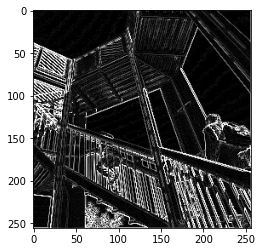

In [66]:
def pooling_2x2(height,width, image):
  new_x = int(height/2)
  new_y = int(width/2)
  newImage = np.zeros((new_x, new_y))
  for x in range(0, height, 2):
    for y in range(0, width, 2):
      pixels = []
      pixels.append(i_copy[x, y])
      pixels.append(i_copy[x+1, y])
      pixels.append(i_copy[x, y+1])
      pixels.append(i_copy[x+1, y+1])
      newImage[int(x/2),int(y/2)] = max(pixels)
  return newImage, pixels

img, pix= pooling_2x2(height, width, i_copy)
  # Plot the image. Note the size of the axes -- now 256 pixels instead of 512
show_img(img)